In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
adult_trainraw=pd.read_csv(r'C:\Users\Shreyas\adult_data (1).csv',header=None, delimiter=' *, *')  # delimiter is used to remove all the unwanted spaces between the data

In [3]:
adult_trainraw

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
adult_trainraw.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
                    'marital_status', 'occupation', 'relationship',
                    'race', 'sex', 'capital_gain', 'capital_loss',
                    'hours_per_week', 'native_country', 'income']

In [5]:
adult_trainraw.head(20)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [6]:
adult_trainraw.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,32561.0,NaN,NaN,NaN,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
workclass,32561,9,Private,22696,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,32561.0,NaN,NaN,NaN,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education,32561,16,HS-grad,10501,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_num,32561.0,NaN,NaN,NaN,10.080679,2.57272,1.0,9.0,10.0,12.0,16.0
marital_status,32561,7,Married-civ-spouse,14976,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,32561,15,Prof-specialty,4140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,32561,6,Husband,13193,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,32561,5,White,27816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,32561,2,Male,21790,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
adult_train=pd.DataFrame.copy(adult_trainraw)

In [8]:
adult_train.drop(["fnlwgt","education"],axis=1,inplace=True)

In [9]:
adult_trainraw.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [10]:
adult_train.isnull().sum()

age               0
workclass         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [11]:
adult_train.dtypes

age                int64
workclass         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

# here we know null values are ? so we have to check if the numerical variables have object as there as their data type

In [12]:
# but we can see every numerical value has numerical hence we can conclude that the numerical var do not have null values

In [13]:
for i in adult_train.columns:
    print({i:adult_train[i].unique()})

{'age': array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87], dtype=int64)}
{'workclass': array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)}
{'education_num': array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)}
{'marital_status': array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)}
{'occupation': array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing'

In [14]:
adult_train.duplicated().sum()

3465

In [15]:
adult_train.drop_duplicates(inplace=True)

In [16]:
adult_train.replace('?',np.nan,inplace=True) # to replace every null value here ? with nan 

In [17]:
adult_train.isnull().sum()

age                  0
workclass         1632
education_num        0
marital_status       0
occupation        1639
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     580
income               0
dtype: int64

In [18]:
adult_train.shape

(29096, 13)

In [19]:
adult_train.columns

Index(['age', 'workclass', 'education_num', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
       'hours_per_week', 'native_country', 'income'],
      dtype='object')

In [20]:
for val in adult_train.columns:
    adult_train[val].fillna(adult_train[val].mode()[0],inplace=True) # replaces null value with mode val of the specific column

In [21]:
adult_train.isnull().sum()

age               0
workclass         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [22]:
adult_train.workclass.value_counts()

Private             21253
Self-emp-not-inc     2473
Local-gov            2040
State-gov            1272
Self-emp-inc         1091
Federal-gov           946
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [23]:
adult_train

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,53,Private,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32555,22,Private,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [24]:
adult_train

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,53,Private,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32555,22,Private,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [25]:
le=LabelEncoder()
for i in adult_train.columns:
    if adult_train[i].dtype=="object":
        adult_train[i]=le.fit_transform(adult_train[i])

In [26]:
adult_train

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,6,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,13,2,3,0,4,1,0,0,13,38,0
2,38,3,9,0,5,1,4,1,0,0,40,38,0
3,53,3,7,2,5,0,2,1,0,0,40,38,0
4,28,3,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,53,3,14,2,3,0,4,1,0,0,40,38,1
32555,22,3,10,4,10,1,4,1,0,0,40,38,0
32556,27,3,12,2,12,5,4,0,0,0,38,38,0
32558,58,3,9,6,0,4,4,0,0,0,40,38,0


In [27]:
adult_train_new=pd.get_dummies(adult_train) # creates more columns for categorical variable and inputs 1 where the categorical var data is true
adult_train_new

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,6,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,13,2,3,0,4,1,0,0,13,38,0
2,38,3,9,0,5,1,4,1,0,0,40,38,0
3,53,3,7,2,5,0,2,1,0,0,40,38,0
4,28,3,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,53,3,14,2,3,0,4,1,0,0,40,38,1
32555,22,3,10,4,10,1,4,1,0,0,40,38,0
32556,27,3,12,2,12,5,4,0,0,0,38,38,0
32558,58,3,9,6,0,4,4,0,0,0,40,38,0


In [28]:
adult_train_new.shape

(29096, 13)

In [29]:
adult_train_new.columns

Index(['age', 'workclass', 'education_num', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
       'hours_per_week', 'native_country', 'income'],
      dtype='object')

In [30]:
adult_train_new1=pd.get_dummies(adult_train,drop_first=True)
adult_train_new1

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,6,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,13,2,3,0,4,1,0,0,13,38,0
2,38,3,9,0,5,1,4,1,0,0,40,38,0
3,53,3,7,2,5,0,2,1,0,0,40,38,0
4,28,3,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,53,3,14,2,3,0,4,1,0,0,40,38,1
32555,22,3,10,4,10,1,4,1,0,0,40,38,0
32556,27,3,12,2,12,5,4,0,0,0,38,38,0
32558,58,3,9,6,0,4,4,0,0,0,40,38,0


In [31]:
#one hot encoder  out puts is a array
# it is more used because get dummies take a lot of time on big data  mostly used in deep learning


In [32]:
adult_train.income.value_counts()

0    21886
1     7210
Name: income, dtype: int64

In [33]:
from sklearn.preprocessing import LabelBinarizer

In [34]:
le=LabelEncoder()
for i in adult_train.columns:
    if adult_train[i].dtype=="object":
        adult_train[i]=le.fit_transform(adult_train[i])
        """
        le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
        print('Feature', i)
        print('mapping', le_name_mapping)
        """

In [35]:
adult_train

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,6,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,13,2,3,0,4,1,0,0,13,38,0
2,38,3,9,0,5,1,4,1,0,0,40,38,0
3,53,3,7,2,5,0,2,1,0,0,40,38,0
4,28,3,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,53,3,14,2,3,0,4,1,0,0,40,38,1
32555,22,3,10,4,10,1,4,1,0,0,40,38,0
32556,27,3,12,2,12,5,4,0,0,0,38,38,0
32558,58,3,9,6,0,4,4,0,0,0,40,38,0


In [36]:
# create x and Y in Arrays as the code runs faster on array than dataframe
X=adult_train.values[:,0:-1]
Y=adult_train.values[:,-1]

In [37]:
X.shape

(29096, 12)

In [38]:
Y.shape # 1D array

(29096,)

In [39]:
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [40]:
X

array([[-0.01836354,  2.50168388,  1.09532824, ..., -0.22918623,
        -0.05008321,  0.27686061],
       [ 0.78532337,  1.63827296,  1.09532824, ..., -0.22918623,
        -2.17019141,  0.27686061],
       [-0.09142599, -0.08854888, -0.41687439, ..., -0.22918623,
        -0.05008321,  0.27686061],
       ...,
       [-0.8951129 , -0.08854888,  0.71727758, ..., -0.22918623,
        -0.20712826,  0.27686061],
       [ 1.36982294, -0.08854888, -0.41687439, ..., -0.22918623,
        -0.05008321,  0.27686061],
       [ 0.93144826,  0.77486204, -0.41687439, ..., -0.22918623,
        -0.05008321,  0.27686061]])

In [41]:
Y=Y.astype(int) 

In [42]:
Y

array([0, 0, 0, ..., 0, 0, 1])

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)

In [44]:
X_train.shape

(20367, 12)

In [45]:
X_test.shape

(8729, 12)

In [46]:
Y_train.shape

(20367,)

In [47]:
Y_test.shape

(8729,)

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
Lr=LogisticRegression() # applying log reg
Lr.fit(X_train,Y_train)
Y_predlr=Lr.predict(X_test)
Y_predlr

array([0, 1, 0, ..., 0, 0, 0])

In [112]:
print(Lr.intercept_)
print()
print(Lr.coef_)
print()
print(Lr.n_iter_)
print()
print(list(zip(adult_train.columns[:-1],Lr.coef_.ravel()))) # ravel changes coef array to 1D

[-1.40679953]

[[ 0.39910151  0.84824704 -0.33032615  0.00813225 -0.18055809  0.11350519
   0.4023116   2.46047629  0.29874558  0.35152152]]

[15]

[('age', 0.399101508410027), ('workclass', 0.8482470432148902), ('education_num', -0.3303261475320465), ('marital_status', 0.008132247200637226), ('occupation', -0.18055809009412624), ('relationship', 0.11350519049283098), ('race', 0.40231160380108294), ('sex', 2.460476290633362), ('capital_gain', 0.29874557716416916), ('capital_loss', 0.3515215172740206)]


In [51]:
#print(list(zip(Y_pred,Y_test)))
print(Lr.score(X_train,Y_train))

0.8230961850051554


In [52]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfmlr=confusion_matrix(Y_test,Y_predlr)
print("Confusion matrix by Log Reg:")
print(cfmlr)
class_rlr=classification_report(Y_test,Y_predlr)
print("Classfication rep by Log reg:")
print(class_rlr)
acc_slr=accuracy_score(Y_test,Y_predlr)
print("Accuracy score by Log reg:",acc_slr)

Confusion matrix by Log Reg:
[[6178  372]
 [1211  968]]
Classfication rep by Log reg:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      6550
           1       0.72      0.44      0.55      2179

    accuracy                           0.82      8729
   macro avg       0.78      0.69      0.72      8729
weighted avg       0.81      0.82      0.80      8729

Accuracy score by Log reg: 0.8186504754267384


Feature: 0, coef: 0.405779343876848
Feature: 1, coef: -0.1213714766417294
Feature: 2, coef: 0.8485779019763946
Feature: 3, coef: -0.3287470332123412
Feature: 4, coef: 0.006689311450831112
Feature: 5, coef: -0.1822354396676346
Feature: 6, coef: 0.11322541206573734
Feature: 7, coef: 0.4139213236936007
Feature: 8, coef: 2.458411381190768
Feature: 9, coef: 0.2982110884676925
Feature: 10, coef: 0.3583121147226165
Feature: 11, coef: 0.03696683825802394


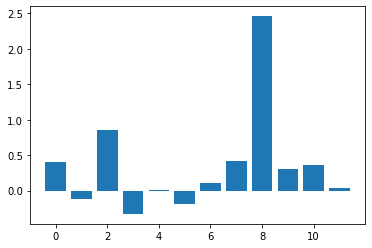

In [53]:
coef=Lr.coef_[0]        # shows importance of variance of  X variable on Y
for i, coeff in enumerate(coef):   
    print(f"Feature: {i}, coef: {coeff}")   
plt.bar([n for n in range(len(coef))], coef)   
plt.show()  

In [54]:
Y_pred_prob=Lr.predict_proba(X_test) # this is the matrix we use to adjust the threshold 
Y_pred_prob

array([[0.98156056, 0.01843944],
       [0.33724397, 0.66275603],
       [0.56244389, 0.43755611],
       ...,
       [0.77101923, 0.22898077],
       [0.76532832, 0.23467168],
       [0.95115773, 0.04884227]])

In [114]:
Y_pred_class=[] # to adjust the threshold from 0.5 to 0.4 this helps the model to focus on value 1 in our income column i.e >50k  
for i in Y_pred_prob[:,1]:
    if i>0.4:
        Y_pred_class.append(1)
    else:
        Y_pred_class.append(0)
#print(Y_pred_class)

In [56]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfmat=confusion_matrix(Y_test,Y_pred_class)
print("Confusion matrix by  adjusting threshold :")
print(cfmat)
class_rat=classification_report(Y_test,Y_pred_class)
print("Classfication rep by adjusting threshold:")
print(class_rat)
acc_sat=accuracy_score(Y_test,Y_pred_class)
print("Accuracy score by adjusting threshold:",acc_sat)

Confusion matrix by  adjusting threshold :
[[5906  644]
 [ 973 1206]]
Classfication rep by adjusting threshold:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      6550
           1       0.65      0.55      0.60      2179

    accuracy                           0.81      8729
   macro avg       0.76      0.73      0.74      8729
weighted avg       0.81      0.81      0.81      8729

Accuracy score by adjusting threshold: 0.8147554129911788


In [57]:
Y_pred_class=[] # to adjust the threshold from 0.5 to 0.4 this helps the model to focus on value 1 in our income column i.e >50k  
for i in Y_pred_prob[:,1]:
    if i>0.3:
        Y_pred_class.append(1)
    else:
        Y_pred_class.append(0)
#print(Y_pred_class)

In [58]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfmat=confusion_matrix(Y_test,Y_pred_class)
print("Confusion matrix by  adjusting threshold :")
print(cfmat)
class_rat=classification_report(Y_test,Y_pred_class)
print("Classfication rep by adjusting threshold:")
print(class_rat)
acc_sat=accuracy_score(Y_test,Y_pred_class)
print("Accuracy score by adjusting threshold:",acc_sat)

Confusion matrix by  adjusting threshold :
[[5458 1092]
 [ 717 1462]]
Classfication rep by adjusting threshold:
              precision    recall  f1-score   support

           0       0.88      0.83      0.86      6550
           1       0.57      0.67      0.62      2179

    accuracy                           0.79      8729
   macro avg       0.73      0.75      0.74      8729
weighted avg       0.81      0.79      0.80      8729

Accuracy score by adjusting threshold: 0.7927597662962539


In [59]:
Y_pred_class=[] # to adjust the threshold from 0.5 to 0.4 this helps the model to focus on value 1 in our income column i.e >50k  
for i in Y_pred_prob[:,1]:
    if i>0.6:
        Y_pred_class.append(1)
    else:
        Y_pred_class.append(0)
#print(Y_pred_class)

In [60]:
cfmat=confusion_matrix(Y_test,Y_pred_class)
print("Confusion matrix by  adjusting threshold :")
print(cfmat)
class_rat=classification_report(Y_test,Y_pred_class)
print("Classfication rep by adjusting threshold:")
print(class_rat)
acc_sat=accuracy_score(Y_test,Y_pred_class)
print("Accuracy score by adjusting threshold:",acc_sat)

Confusion matrix by  adjusting threshold :
[[6359  191]
 [1429  750]]
Classfication rep by adjusting threshold:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      6550
           1       0.80      0.34      0.48      2179

    accuracy                           0.81      8729
   macro avg       0.81      0.66      0.68      8729
weighted avg       0.81      0.81      0.79      8729

Accuracy score by adjusting threshold: 0.8144117310115706


In [61]:
for a in np.arange(0.4,0.5,0.001):
    predict_mine=np.where(Y_pred_prob[:,1] > a, 1, 0) # if else used in numpy Y_pred_prob is the for(condition) line,if it is >a here append 1 and if it doesnt satisfy the condition append 0  
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error(FN) :", 
          cfm[1,0]," , type 1 error(FP):", cfm[0,1]) 

Errors at threshold  0.4 : 1617  , type 2 error(FN) : 973  , type 1 error(FP): 644
Errors at threshold  0.401 : 1617  , type 2 error(FN) : 976  , type 1 error(FP): 641
Errors at threshold  0.402 : 1614  , type 2 error(FN) : 979  , type 1 error(FP): 635
Errors at threshold  0.403 : 1614  , type 2 error(FN) : 981  , type 1 error(FP): 633
Errors at threshold  0.404 : 1611  , type 2 error(FN) : 983  , type 1 error(FP): 628
Errors at threshold  0.405 : 1614  , type 2 error(FN) : 987  , type 1 error(FP): 627
Errors at threshold  0.406 : 1612  , type 2 error(FN) : 987  , type 1 error(FP): 625
Errors at threshold  0.40700000000000003 : 1608  , type 2 error(FN) : 988  , type 1 error(FP): 620
Errors at threshold  0.40800000000000003 : 1604  , type 2 error(FN) : 991  , type 1 error(FP): 613
Errors at threshold  0.40900000000000003 : 1605  , type 2 error(FN) : 994  , type 1 error(FP): 611
Errors at threshold  0.41000000000000003 : 1602  , type 2 error(FN) : 995  , type 1 error(FP): 607
Errors at t

Errors at threshold  0.4840000000000001 : 1585  , type 2 error(FN) : 1183  , type 1 error(FP): 402
Errors at threshold  0.4850000000000001 : 1586  , type 2 error(FN) : 1185  , type 1 error(FP): 401
Errors at threshold  0.4860000000000001 : 1587  , type 2 error(FN) : 1188  , type 1 error(FP): 399
Errors at threshold  0.4870000000000001 : 1588  , type 2 error(FN) : 1190  , type 1 error(FP): 398
Errors at threshold  0.4880000000000001 : 1588  , type 2 error(FN) : 1192  , type 1 error(FP): 396
Errors at threshold  0.4890000000000001 : 1585  , type 2 error(FN) : 1192  , type 1 error(FP): 393
Errors at threshold  0.4900000000000001 : 1586  , type 2 error(FN) : 1194  , type 1 error(FP): 392
Errors at threshold  0.4910000000000001 : 1585  , type 2 error(FN) : 1196  , type 1 error(FP): 389
Errors at threshold  0.4920000000000001 : 1584  , type 2 error(FN) : 1197  , type 1 error(FP): 387
Errors at threshold  0.4930000000000001 : 1582  , type 2 error(FN) : 1198  , type 1 error(FP): 384
Errors at 

# while finalising the threshold focus on upon reducing the total error compared to the base model(0.5) and then finalize that threshold which gives you the lower number of type of errors that are predicted more in the base model 

In [62]:
Y_pred_class=[] # to adjust the threshold from 0.5 to 0.4 this helps the model to focus on value 1 in our income column i.e >50k  
for i in Y_pred_prob[:,1]:
    if i>0.45:
        Y_pred_class.append(1)
    else:
        Y_pred_class.append(0)
#print(Y_pred_class)

In [63]:
cfmat=confusion_matrix(Y_test,Y_pred_class)
print("Confusion matrix by  adjusting threshold :")
print(cfmat)
class_rat=classification_report(Y_test,Y_pred_class)
print("Classfication rep by adjusting threshold:")
print(class_rat)
acc_sat=accuracy_score(Y_test,Y_pred_class)
print("Accuracy score by adjusting threshold:",acc_sat)

Confusion matrix by  adjusting threshold :
[[6064  486]
 [1097 1082]]
Classfication rep by adjusting threshold:
              precision    recall  f1-score   support

           0       0.85      0.93      0.88      6550
           1       0.69      0.50      0.58      2179

    accuracy                           0.82      8729
   macro avg       0.77      0.71      0.73      8729
weighted avg       0.81      0.82      0.81      8729

Accuracy score by adjusting threshold: 0.8186504754267384


In [64]:
from sklearn import metrics
fpr,tpr,z=metrics.roc_curve(Y_test,Y_pred_prob[:,1]) # tries for every threshold between 0.0 to 1.0
auc=metrics.auc(fpr,tpr)
print(auc) # AUC VAL
  # fpr (1 - means specificity ) i.e (1-recall of class 0)
# tpr  (1-means sensitivity) i.e ( 1-recall of class 1)


0.8471623302236126


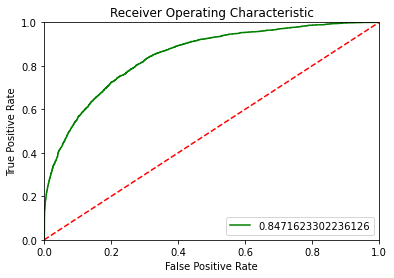

In [65]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, 'g', label = auc) # shows auc ,"g" for color green
plt.legend(loc = 'lower right') # position of auc val in graph
plt.plot([0, 1], [0, 1],'r--') # linear line from 0,0 to 1,1 
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

In [66]:
from sklearn import metrics
fpr_adj,tpr_adj,z=metrics.roc_curve(Y_test,Y_pred_class)
auc_adj=metrics.auc(fpr_adj,tpr_adj)
print(auc_adj) # AUC VAL
print(fpr_adj)   # fpr (1 - means specificity ) i.e (1-recall of class 0)
print(tpr_adj)# tpr  (1-means sensitivity) i.e ( 1-recall of class 1)
# auc value here will always be lower than the upper auc value 

0.7111797904354192
[0.         0.07419847 1.        ]
[0.         0.49655805 1.        ]


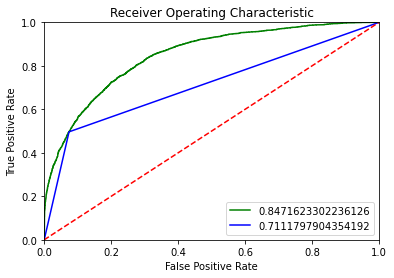

In [67]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, 'g', label = auc) # shows auc ,"g" for color green
plt.plot(fpr_adj,tpr_adj, 'b', label = auc_adj)
plt.legend(loc = 'lower right') # position of auc val in graph
plt.plot([0, 1], [0, 1],'r--') # linear line from 0,0 to 1,1 
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
 
plt.show()

AUC:
1. Find out the overall AUC of the model by passing the entire prob matrix to the roc_curve function. It will try and test various different thresholds and end up giving a proper ROC curve.
2. Try generating the AUC value on the basis of individual thresholds.(try only upon the ambiguous thresholds which end up giving you almost the same error)
3. Finally conclude upon the threshold which gives you an AUC closest to the overall AUC.

# Tuning

# SGD classifier


In [68]:
from sklearn.linear_model import SGDClassifier

In [69]:
model=SGDClassifier(loss="log",random_state=10,
                    learning_rate="constant",eta0=0.01,max_iter=2000,shuffle=True,
                    early_stopping=True,n_iter_no_change=7)  #loss=log will apply log 
model.fit(X_train,Y_train)
Y_pred_sgdc=model.predict(X_test)
print(Y_pred_sgdc)
print (list(zip(adult_train.columns[:-1],model.coef_.ravel())))

[0 1 0 ... 0 0 0]
[('age', 0.42504245410063235), ('workclass', -0.14737843972866513), ('education_num', 0.9481728943149391), ('marital_status', -0.3446752221716509), ('occupation', -0.161216003796759), ('relationship', -0.20939745818309055), ('race', 0.16539427629975134), ('sex', 0.44957042067592135), ('capital_gain', 2.4018144912748323), ('capital_loss', 0.2719412802761812), ('hours_per_week', 0.4284191173067226), ('native_country', 0.060301268810614816)]


In [70]:
cfmsc=confusion_matrix(Y_test,Y_pred_sgdc)
print("Confusion matrix by SGD classfier :")
print(cfmsc)
class_rsc=classification_report(Y_test,Y_pred_sgdc)
print("Classfication rep by  SGD classfier :")
print(class_rat)
acc_ssc=accuracy_score(Y_test,Y_pred_sgdc)
print("Accuracy score by  SGD classfier :",acc_ssc)

Confusion matrix by SGD classfier :
[[6168  382]
 [1192  987]]
Classfication rep by  SGD classfier :
              precision    recall  f1-score   support

           0       0.85      0.93      0.88      6550
           1       0.69      0.50      0.58      2179

    accuracy                           0.82      8729
   macro avg       0.77      0.71      0.73      8729
weighted avg       0.81      0.82      0.81      8729

Accuracy score by  SGD classfier : 0.819681521365563


In [71]:
model.n_iter_


8

In [72]:
?SGDClassifier

In [73]:
adult_testraw=pd.read_csv(r"C:\Users\Shreyas\adult_test.csv",header=None,delimiter=' *, *') 

In [74]:
adult_testraw.columns=['age', 'workclass', 'fnlwgt', 'education', 'education_num',
                    'marital_status', 'occupation', 'relationship',
                    'race', 'sex', 'capital_gain', 'capital_loss',
                    'hours_per_week', 'native_country', 'income']

In [75]:
adult_testraw.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,16281.0,NaN,NaN,NaN,38.767459,13.849187,17.0,28.0,37.0,48.0,90.0
workclass,16281,9,Private,11210,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,16281.0,NaN,NaN,NaN,189435.677784,105714.907671,13492.0,116736.0,177831.0,238384.0,1490400.0
education,16281,16,HS-grad,5283,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_num,16281.0,NaN,NaN,NaN,10.072907,2.567545,1.0,9.0,10.0,12.0,16.0
marital_status,16281,7,Married-civ-spouse,7403,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,16281,15,Prof-specialty,2032,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,16281,6,Husband,6523,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,16281,5,White,13946,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,16281,2,Male,10860,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
adult_testraw.drop(["fnlwgt","education"],axis=1,inplace=True)

In [77]:
adult_test=pd.DataFrame.copy(adult_testraw)

In [78]:
adult_test

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [79]:
for i in adult_test.columns:
    print({i:adult_test[i].unique()})

{'age': array([25, 38, 28, 44, 18, 34, 29, 63, 24, 55, 65, 36, 26, 58, 48, 43, 20,
       37, 40, 72, 45, 22, 23, 54, 32, 46, 56, 17, 39, 52, 21, 42, 33, 30,
       47, 41, 19, 69, 50, 31, 59, 49, 51, 27, 57, 61, 64, 79, 73, 53, 77,
       80, 62, 35, 68, 66, 75, 60, 67, 71, 70, 90, 81, 74, 78, 82, 83, 85,
       76, 84, 89, 88, 87], dtype=int64)}
{'workclass': array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)}
{'education_num': array([ 7,  9, 12, 10,  6, 15,  4, 13, 14, 16,  3, 11,  5,  8,  2,  1],
      dtype=int64)}
{'marital_status': array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced',
       'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)}
{'occupation': array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', '?',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tec

In [80]:
adult_test.duplicated().sum()

1022

In [81]:
adult_test.drop_duplicates(inplace=True)

In [82]:
for val in adult_test.columns:
    adult_test[val].fillna(adult_test[val].mode()[0],inplace=True) 

In [83]:
adult_test.isnull().sum()

age               0
workclass         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [84]:

for i in adult_test.columns:
    if adult_test[i].dtype=="object":
        adult_test[i]=le.fit_transform(adult_test[i])

In [85]:
X_test_new=adult_test.values[:,0:-1]
Y_test_new=adult_test.values[:,-1]


In [86]:
X_test_new=scaler.transform(X_test_new)
Y_test_new=Y_test_new.astype(int)

In [87]:
Y_pred_lrnew=Lr.predict(X_test_new)
Y_pred_lrnew

array([0, 0, 0, ..., 0, 1, 0])

In [88]:
Y_pred_prob_new=Lr.predict_proba(X_test_new) # this is the matrix we use to adjust the threshold 
Y_pred_prob_new

array([[0.97739292, 0.02260708],
       [0.80864249, 0.19135751],
       [0.6978158 , 0.3021842 ],
       ...,
       [0.53732008, 0.46267992],
       [0.23805571, 0.76194429],
       [0.51800665, 0.48199335]])

In [89]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfmlrnew=confusion_matrix(Y_test_new,Y_pred_lrnew)
print("Confusion matrix by Log Reg on test data:")
print(cfmlrnew)
class_rlrnew=classification_report(Y_test_new,Y_pred_lrnew)
print("Classfication rep by Log reg on test data:")
print(class_rlrnew)
acc_slrnew=accuracy_score(Y_test_new,Y_pred_lrnew)
print("Accuracy score by Log reg on test data:",acc_slrnew)

Confusion matrix by Log Reg on test data:
[[11048   556]
 [ 2132  1523]]
Classfication rep by Log reg on test data:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89     11604
           1       0.73      0.42      0.53      3655

    accuracy                           0.82     15259
   macro avg       0.79      0.68      0.71     15259
weighted avg       0.81      0.82      0.81     15259

Accuracy score by Log reg on test data: 0.8238416672127925


In [90]:
Y_pred_class_new=[] # to adjust the threshold from 0.5 to 0.4 this helps the model to focus on value 1 in our income column i.e >50k  
for i in Y_pred_prob_new[:,1]:
    if i>0.45:
        Y_pred_class_new.append(1)
    else:
        Y_pred_class_new.append(0)
#print(Y_pred_class)

In [91]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfmlranew=confusion_matrix(Y_test_new,Y_pred_class_new)
print("Confusion matrix by Log Reg on test data:")
print(cfmlranew)
class_rlranew=classification_report(Y_test_new,Y_pred_class_new)
print("Classfication rep by Log reg on test data:")
print(class_rlranew)
acc_slranew=accuracy_score(Y_test_new,Y_pred_class_new)
print("Accuracy score by Log reg on test data:",acc_slranew)

Confusion matrix by Log Reg on test data:
[[10838   766]
 [ 1943  1712]]
Classfication rep by Log reg on test data:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89     11604
           1       0.69      0.47      0.56      3655

    accuracy                           0.82     15259
   macro avg       0.77      0.70      0.72     15259
weighted avg       0.81      0.82      0.81     15259

Accuracy score by Log reg on test data: 0.8224654302378924


# cross validation

In [92]:
from sklearn.model_selection import cross_val_score,KFold,StratifiedKFold

In [93]:
# Evaluation
LR=LogisticRegression()
 
#performing kfold_cross_validation
kfold_cv=KFold(n_splits=10,random_state=10,shuffle=True)
#print(kfold_cv)

#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=LR,X=X_train,
                                y=Y_train, cv=kfold_cv)
print(kfold_cv_result)
#finding the mean
print(kfold_cv_result.mean())
 



[0.81492391 0.80805106 0.82032401 0.83799705 0.83210604 0.82621502
 0.82326951 0.82367387 0.82760314 0.80992141]
0.8224085026228911


In [94]:
# There is  a slight difference between base model and cross- validated model we can go ahead for base model

In [95]:
#Tuning just for Template purpose
for train_value, test_value in kfold_cv.split(X_train): #train value will be index value of train data of 9 folds and test value will be index value of test data of the 1 fold
    LR.fit(X_train[train_value], Y_train[train_value]).predict(X_train[test_value]) 
    
Y_pred_cv=LR.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

In [96]:
Y_pred_cv

array([0, 1, 0, ..., 0, 0, 0])

In [97]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfmlracv=confusion_matrix(Y_test,Y_pred_cv)
print("Confusion matrix by Log Reg  k fold Cv method:")
print(cfmlranew)
class_rlracv=classification_report(Y_test,Y_pred_cv)
print("Classfication rep by Log  k fold Reg Cv method:")
print(class_rlranew)
acc_slracv=accuracy_score(Y_test,Y_pred_cv)
print("Accuracy score by Log reg k fold Cv method:",acc_slranew)

Confusion matrix by Log Reg  k fold Cv method:
[[10838   766]
 [ 1943  1712]]
Classfication rep by Log  k fold Reg Cv method:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89     11604
           1       0.69      0.47      0.56      3655

    accuracy                           0.82     15259
   macro avg       0.77      0.70      0.72     15259
weighted avg       0.81      0.82      0.81     15259

Accuracy score by Log reg k fold Cv method: 0.8224654302378924


In [98]:
# stratified Evaluation
LR=LogisticRegression()
 
#performing kfold_cross_validation
skfold_cv=StratifiedKFold(n_splits=10,random_state=10,shuffle=True)
#print(kfold_cv)

#running the model using scoring metric as accuracy
kfold_scv_result=cross_val_score(estimator=LR,X=X_train,
                                y=Y_train, cv=skfold_cv)
print(kfold_cv_result)
#finding the mean
print(kfold_cv_result.mean())
 



[0.81492391 0.80805106 0.82032401 0.83799705 0.83210604 0.82621502
 0.82326951 0.82367387 0.82760314 0.80992141]
0.8224085026228911


In [99]:
for train_value, test_value in skfold_cv.split(X_train,Y_train):
    LR.fit(X_train[train_value], Y_train[train_value]).predict(X_train[test_value]) 
    
Y_pred_scv=LR.predict(X_test)

In [100]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfmlr_scv=confusion_matrix(Y_test,Y_pred_scv)
print("Confusion matrix by Log Reg stratified K fold Cv method:")
print(cfmlr_scv)
class_ralr_scv=classification_report(Y_test,Y_pred_scv)
print("Classfication rep by Log Reg Stratified Kfold Cv method:")
print(class_ralr_scv)
acc_slr_scv=accuracy_score(Y_test,Y_pred_scv)
print("Accuracy score by Log reg Stratified Kfold Cv method:",acc_slr_scv)

Confusion matrix by Log Reg stratified K fold Cv method:
[[6179  371]
 [1215  964]]
Classfication rep by Log Reg Stratified Kfold Cv method:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      6550
           1       0.72      0.44      0.55      2179

    accuracy                           0.82      8729
   macro avg       0.78      0.69      0.72      8729
weighted avg       0.81      0.82      0.80      8729

Accuracy score by Log reg Stratified Kfold Cv method: 0.8183067934471303


#classifier=LogisticRegression()
 
#performing kfold_cross_validation
from sklearn.model_selection import LeaveOneOut
kfold_cv=LeaveOneOut()
#print(kfold_cv)
 
from sklearn.model_selection import cross_val_score
#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=classifier,X=X_train,
                                                 y=Y_train, cv=kfold_cv)
print(kfold_cv_result)
#finding the mean
print(kfold_cv_result.mean())

## Inbuilt feature selection

Recursive Feature Elimination:
1st-All the independent variables (X) will be considered and the model will be built. It will eliminate the variable which has the least significance in the model.
2nd-(X-1) variables will be considered and the model will be rebuilt.
The process continues till the time we are left off with the given no of variables in the model.
RFE model will be ready to predict upon the testing data.

In [101]:
colname=adult_train.columns

 

from sklearn.feature_selection import RFE
rfe = RFE(LR, n_features_to_select=8)
model_rfe = rfe.fit(X_train, Y_train)
print("Num Features: ",model_rfe.n_features_)
print("Selected Features: ") 
print(list(zip(colname, model_rfe.support_)))
print("Feature Ranking: ", model_rfe.ranking_) 

Num Features:  8
Selected Features: 
[('age', True), ('workclass', False), ('education_num', True), ('marital_status', True), ('occupation', False), ('relationship', True), ('race', False), ('sex', True), ('capital_gain', True), ('capital_loss', True), ('hours_per_week', True), ('native_country', False)]
Feature Ranking:  [1 2 1 1 5 1 3 1 1 1 1 4]


In [102]:
Y_pred_rfe=model_rfe.predict(X_test)

In [103]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfmlr_rfe=confusion_matrix(Y_test,Y_pred_rfe)
print("Confusion matrix by Log Reg RFE method:")
print(cfmlr_rfe)
class_ralr_rfe=classification_report(Y_test,Y_pred_rfe)
print("Classfication rep by Log Reg RFE method:")
print(class_ralr_rfe)
acc_slr_rfe=accuracy_score(Y_test,Y_pred_rfe)
print("Accuracy score by Log reg RFE method:",acc_slr_rfe)

Confusion matrix by Log Reg RFE method:
[[6176  374]
 [1209  970]]
Classfication rep by Log Reg RFE method:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      6550
           1       0.72      0.45      0.55      2179

    accuracy                           0.82      8729
   macro avg       0.78      0.69      0.72      8729
weighted avg       0.81      0.82      0.80      8729

Accuracy score by Log reg RFE method: 0.8186504754267384


In [104]:
"""new_data=adult_df_rev[['age','workclass','occupation','sex','income']]
new_data.head()
new_X=new_data.values[:,:-1]
new_Y=new_data.values[:,-1]
print(new_X)
print(new_Y)
"""
#in case the RFE eliminates logically relevant variables, create a  new df manually by subsetting the vaiables
# derived from RFE as well as on the basis of domain knowledge.
#rest of the model building steps will have to be performed manually

"new_data=adult_df_rev[['age','workclass','occupation','sex','income']]\nnew_data.head()\nnew_X=new_data.values[:,:-1]\nnew_Y=new_data.values[:,-1]\nprint(new_X)\nprint(new_Y)\n"

## Feature selection using univariate

In [105]:
X = adult_train.values[:,:-1]
Y = adult_train.values[:,-1]

In [106]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
 
 
test = SelectKBest(score_func=chi2, k=10)
fit1 = test.fit(X, Y)
 
print(fit1.scores_)
print(list(zip(colname,fit1.get_support())))
X = fit1.transform(X)

[6.43514578e+03 8.38585704e-02 2.22392549e+03 9.54508703e+02
 8.88429844e+01 3.15224157e+03 4.00047642e+01 4.63039738e+02
 7.82121650e+07 1.26463193e+06 5.94798702e+03 2.58715403e+01]
[('age', True), ('workclass', False), ('education_num', True), ('marital_status', True), ('occupation', True), ('relationship', True), ('race', True), ('sex', True), ('capital_gain', True), ('capital_loss', True), ('hours_per_week', True), ('native_country', False)]


In [107]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
x=scaler.transform(X)

In [108]:
from sklearn.model_selection import train_test_split
#split the data into test and train
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=10)

In [109]:
scaler=StandardScaler()
X=scaler.fit_transform(X)
X
Y=Y.astype(int) 
Y
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)
X_train.shape
X_test.shape
Y_train.shape
Y_test.shape
from sklearn.linear_model import LogisticRegression
Lr=LogisticRegression() # applying log reg
Lr.fit(X_train,Y_train)
Y_predlr=Lr.predict(X_test)
Y_predlr
print(Lr.intercept_)
print(Lr.coef_)
print(Lr.n_iter_)
print(list(zip(adult_train.columns[:-1],Lr.coef_.ravel()))) # ravel changes coef array to 1D
#print(list(zip(Y_pred,Y_test)))
print(Lr.score(X_train,Y_train))
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfmlr=confusion_matrix(Y_test,Y_predlr)
print("Confusion matrix by Log Reg:")
print(cfmlr)
class_rlr=classification_report(Y_test,Y_predlr)
print("Classfication rep by Log reg:")
print(class_rlr)
acc_slr=accuracy_score(Y_test,Y_predlr)
print("Accuracy score by Log reg:",acc_slr)

[-1.40679953]
[[ 0.39910151  0.84824704 -0.33032615  0.00813225 -0.18055809  0.11350519
   0.4023116   2.46047629  0.29874558  0.35152152]]
[15]
[('age', 0.399101508410027), ('workclass', 0.8482470432148902), ('education_num', -0.3303261475320465), ('marital_status', 0.008132247200637226), ('occupation', -0.18055809009412624), ('relationship', 0.11350519049283098), ('race', 0.40231160380108294), ('sex', 2.460476290633362), ('capital_gain', 0.29874557716416916), ('capital_loss', 0.3515215172740206)]
0.8222124024156724
Confusion matrix by Log Reg:
[[6179  371]
 [1205  974]]
Classfication rep by Log reg:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      6550
           1       0.72      0.45      0.55      2179

    accuracy                           0.82      8729
   macro avg       0.78      0.70      0.72      8729
weighted avg       0.81      0.82      0.80      8729

Accuracy score by Log reg: 0.8194524000458243


In [110]:
X = adult_train.values[:,:-1]
Y = adult_train.values[:,-1]

In [111]:
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(0.2)
fit1 = vt.fit(X, Y)
print(fit1.variances_)
 
features = fit1.transform(X)
print(features.shape[1])
print(list(zip(adult_train.columns,fit1.get_support())))

[1.87331831e+02 1.34142046e+00 6.99680880e+00 2.36140664e+00
 1.57295807e+01 2.63582948e+00 7.83695921e-01 2.23928894e-01
 6.04987082e+07 1.79776802e+05 1.62185295e+02 4.06168170e+01]
12
[('age', True), ('workclass', True), ('education_num', True), ('marital_status', True), ('occupation', True), ('relationship', True), ('race', True), ('sex', True), ('capital_gain', True), ('capital_loss', True), ('hours_per_week', True), ('native_country', True)]
